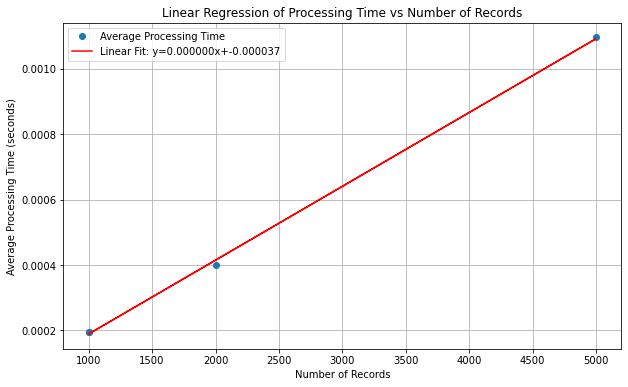

In [7]:
import json
import timeit
import numpy as np
import matplotlib.pyplot as plt

def modify_records(data, record_count):
    for record in data[:record_count]:
        if 'payload' in record and 'size' in record['payload']:
            record['payload']['size'] = 42

def load_data(input_file):
    with open(input_file, 'r') as file:
        return json.load(file)

def time_processing(data, record_count, repetitions):
    return timeit.timeit(lambda: modify_records(data, record_count), number = repetitions) / repetitions

def main(input_file):
    data = load_data(input_file)

    record_counts = np.array([1000, 2000, 5000, 1000])
    repetitions = 100
    times = []

    for count in record_counts:
        avg_time = time_processing(data, count, repetitions)
        times.append(avg_time)

    times = np.array(times)

    N = len(record_counts)
    m = (N * np.sum(record_counts*times) - np.sum(record_counts) * np.sum(times)) / \
        (N * np.sum(record_counts**2) - np.sum(record_counts)**2)
    b = (np.sum(times) - m * np.sum(record_counts)) / N
    line = m * record_counts + b

    plt.figure(figsize=(10, 6))
    plt.plot(record_counts, times, 'o', label='Average Processing Time')
    plt.plot(record_counts, line, label=f'Linear Fit: y={m:.6f}x+{b:.6f}', color='red')
    plt.xlabel('Number of Records')
    plt.ylabel('Average Processing Time (seconds)')
    plt.title('Linear Regression of Processing Time vs Number of Records')
    plt.legend()
    plt.grid(True)

    plt.savefig('output.3.2.png')
    plt.show()

input_file_path = 'large-file.json'
main(input_file_path)